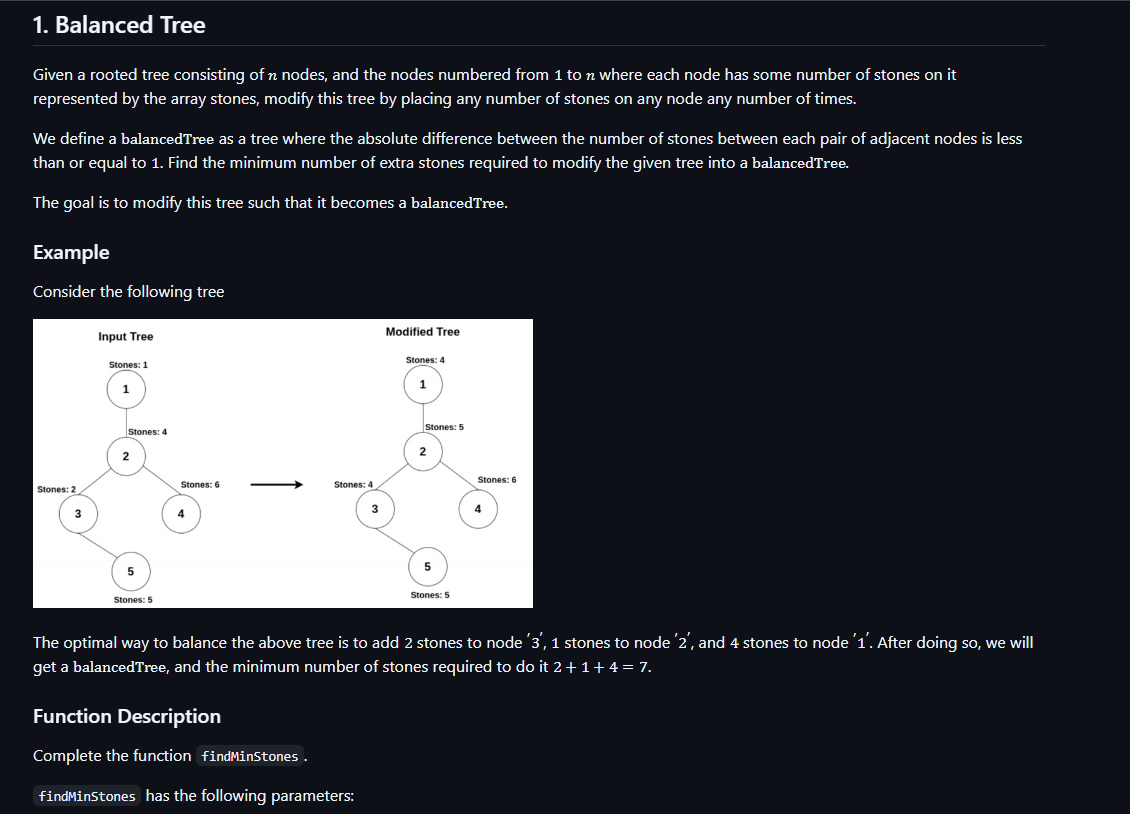

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

void solve(){

    int n,m;
    cin>>n>>m;
    vector<vector<int>>adj(n+1);
    vector<int>stones(n+1);
    for(int i=1;i<=n;i++){
        cin>>stones[i];
    }

    for(int i=0;i<m;i++){
        int u,v;
        cin>>u>>v;
        adj[u].push_back(v);
        adj[v].push_back(u);
    }




    priority_queue<pair<int,int>>pq;



    for(int i=1;i<=n;i++){
        pq.push({stones[i],i});
    }
    int ans=0;


    while(!pq.empty()){
        int curstones=pq.top().first;
        int node=pq.top().second;
        pq.pop();

        for(auto it:adj[node]){
            int diff=abs(stones[node]-stones[it]);
            if(diff>1){
                int stonesadded=diff-1;
                stones[it]+=stonesadded;
                ans+=stonesadded;
                pq.push({stones[it],it});
            }
        }
    }

    cout<<ans<<endl;


    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);    
    // int _t;cin>>_t;while(_t--)
    solve();
}

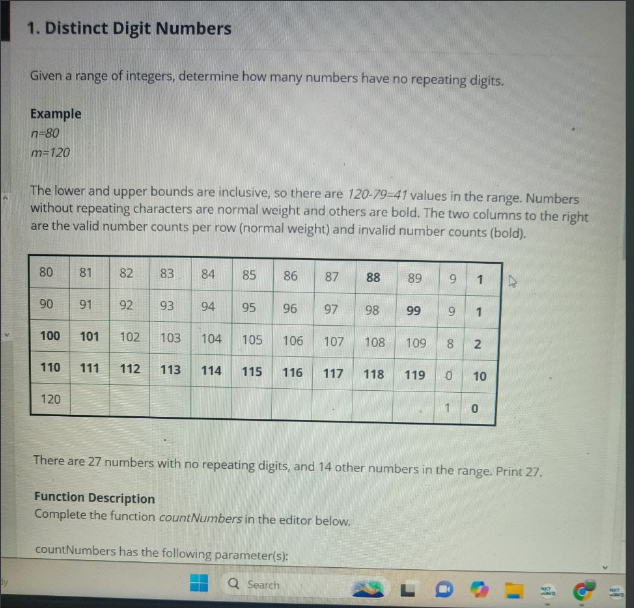

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/


 int dp[10][2][2][1024];

    int f(int index,bool tight,bool repeat,int bitmask,string &s){
        if(index==s.size()){
            if(repeat && bitmask){
                return 1;
            }
            return 0;
        }

        if(dp[index][tight][repeat][bitmask]!=-1){
            return dp[index][tight][repeat][bitmask];
        }

        int ans=0;

        int limit=tight?s[index]-'0':9;
        for(int d=0;d<=limit;d++){
            int newTight=tight&(d==limit);


            if(bitmask==0 && (d==0)){
                ans+=f(index+1,false,repeat,bitmask,s);
            }else if(bitmask&(1<<d)){
                ans+=f(index+1,newTight,true,bitmask,s);
            }else{
                ans+=f(index+1,newTight,repeat,bitmask|(1<<d),s);
            }
        }




        return dp[index][tight][repeat][bitmask]=ans;

        
    }
    int numDupDigitsAtMostN(int n) {


        string s=to_string(n);
        memset(dp,-1,sizeof dp);

        return n-f(0,true,false,0,s);
        
    }

void solve(){
    int l,r;
    cin>>l>>r;

    cout<<numDupDigitsAtMostN(r)-numDupDigitsAtMostN(l-1)<<endl;


    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

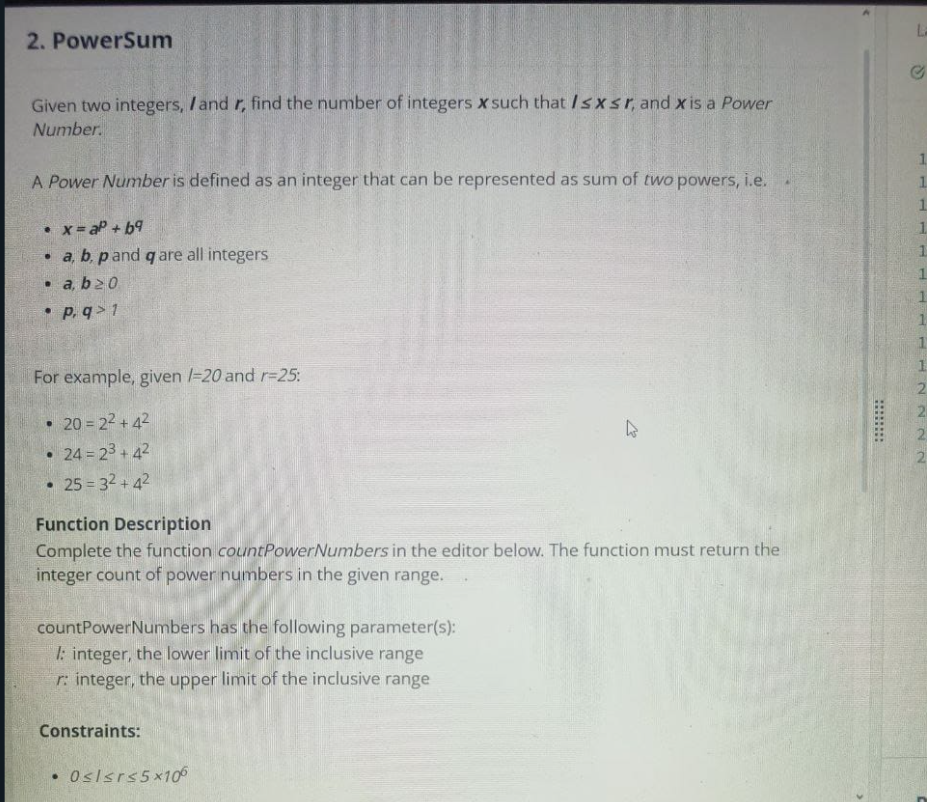

#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

const int mod=1e9+7;

int power(int a,int b){
    int ans=1;
    while(b){
        if(b&1){
            ans=(ans*a)%mod;
        }
        a=(a*a)%mod;
        b>>=1;
    }

    return ans;
}

void solve(){

    int l,r;
    cin>>l>>r;

    vector<int>powers;
    powers.push_back(0);
    powers.push_back(1);


    for(int p=2;p<=24;p++){
        int num=2;

        while(power(num,p)<=r){
            powers.push_back(power(num,p));
            num++;
        }
    }

    vector<int>ok(r+1);
    for(int i=0;i<powers.size();i++){
        for(int j=0;j<powers.size();j++){
            if(powers[i]+powers[j]>=l && powers[i]+powers[j]<=r){
                ok[powers[i]+powers[j]]=1;
            }
        }
    }

    for(int i=1;i<=r;i++){
        ok[i]=(ok[i]+ok[i-1])%mod;
    }
    cout<<ok[r]-ok[l-1]<<endl;
    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);    
    // int _t;cin>>_t;while(_t--)
    solve();
}

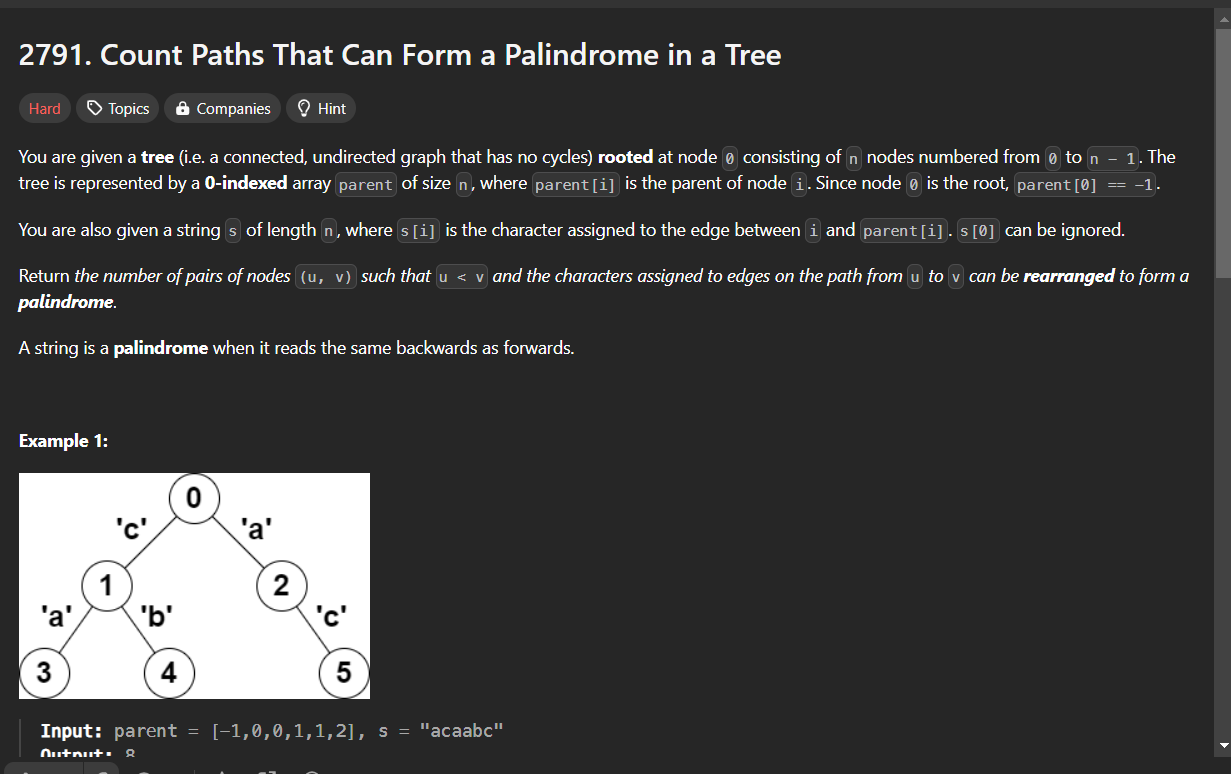

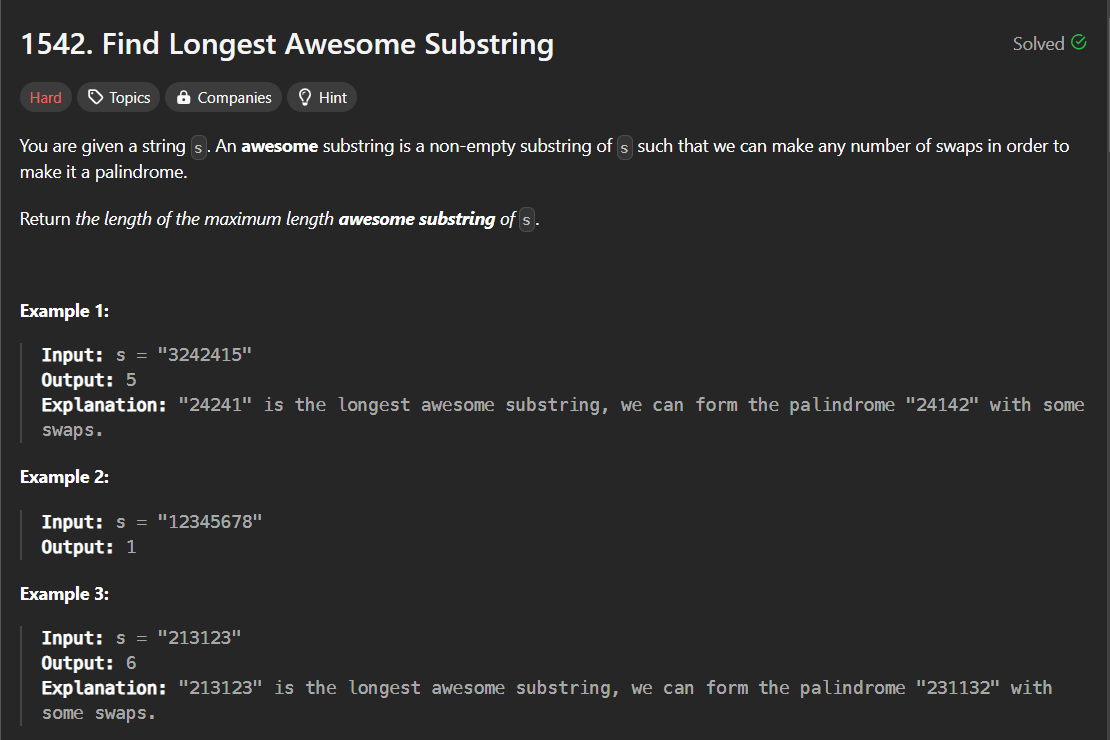

```cpp
class Solution {
public:
    int longestAwesome(string s) {

        int n=s.size();
        int ans=1;
        int mask=0;
        map<int,int>mp;
        mp[0]=-1;
        for(int i=0;i<n;i++){
            mask=mask^(1<<(s[i]-'0'));

            if(mp.find(mask)!=mp.end()){
                ans=max(ans,i-mp[mask]);
            }


            for(int j=0;j<10;j++){
                int temp=(mask^(1<<j));

                if(mp.find(temp)!=mp.end()){
                    ans=max(ans,i-mp[temp]);
                }

            }

            if(mp.find(mask)==mp.end()){
                mp[mask]=i;
            }





        }
        return ans;
        
    }
};

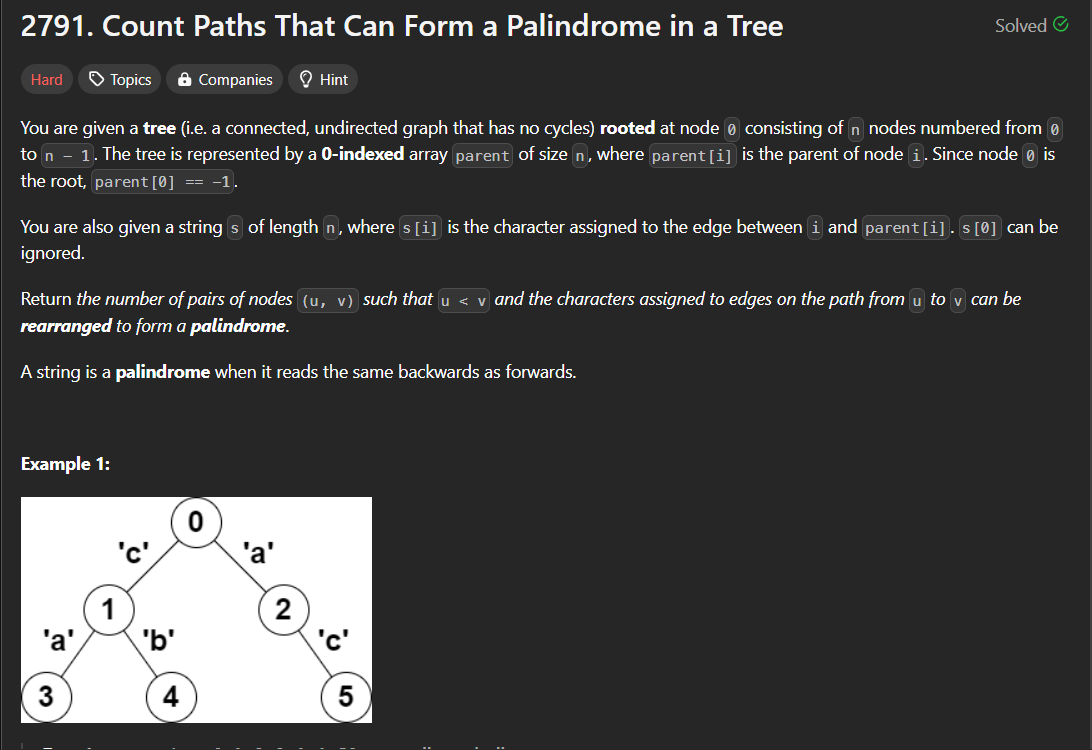

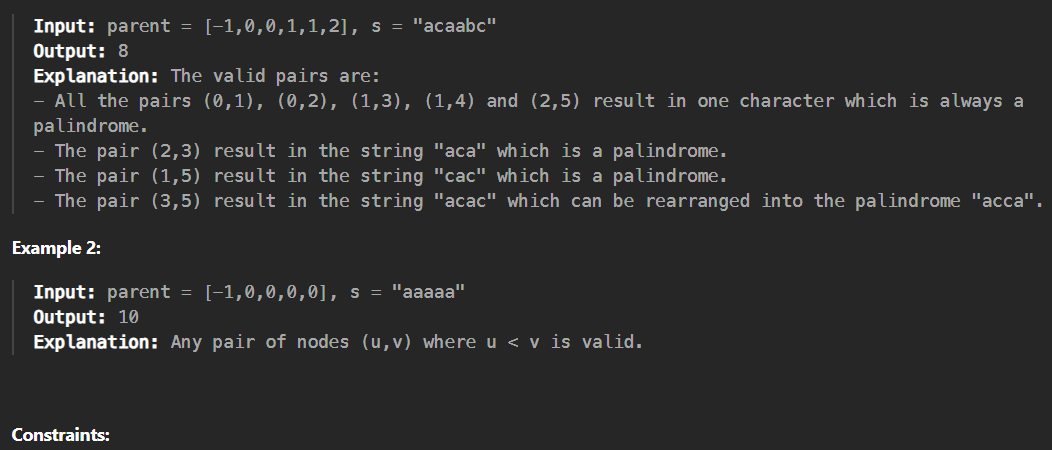

```cpp
class Solution {
public:

    void dfs(int cur,long long mask,vector<vector<pair<int,char>>>&adj,map<int,long long>&mp){
        mp[cur]=mask;
        for(auto &it:adj[cur]){
            mask=mask^(1<<(it.second-'a'));
            dfs(it.first,mask,adj,mp);
            mask=mask^(1<<(it.second-'a'));
        }

    }

    long long countPalindromePaths(vector<int>& parent, string s) {
        map<int,long long>mp;
        int n=parent.size();
        vector<vector<pair<int,char>>>adj(n+1);
        for(int i=1;i<n;i++){
            adj[parent[i]].push_back({i,s[i]});
        }     

        dfs(0,0,adj,mp);   


        map<long long,long long>mp1;
        mp1[0];
        long long ans=0;
        for(int i=1;i<=n;i++){
            long long mask=mp[i];
            if(mp1.find(mask)!=mp1.end()){
                ans+=mp1[mask];
            }


            for(int j=0;j<26;j++){
                long long temp=mask^(1<<j);
                if(mp1.find(temp)!=mp1.end()){
                    ans+=mp1[temp];
                }
            }





            mp1[mask]++;
        }

        return ans;


    }
};

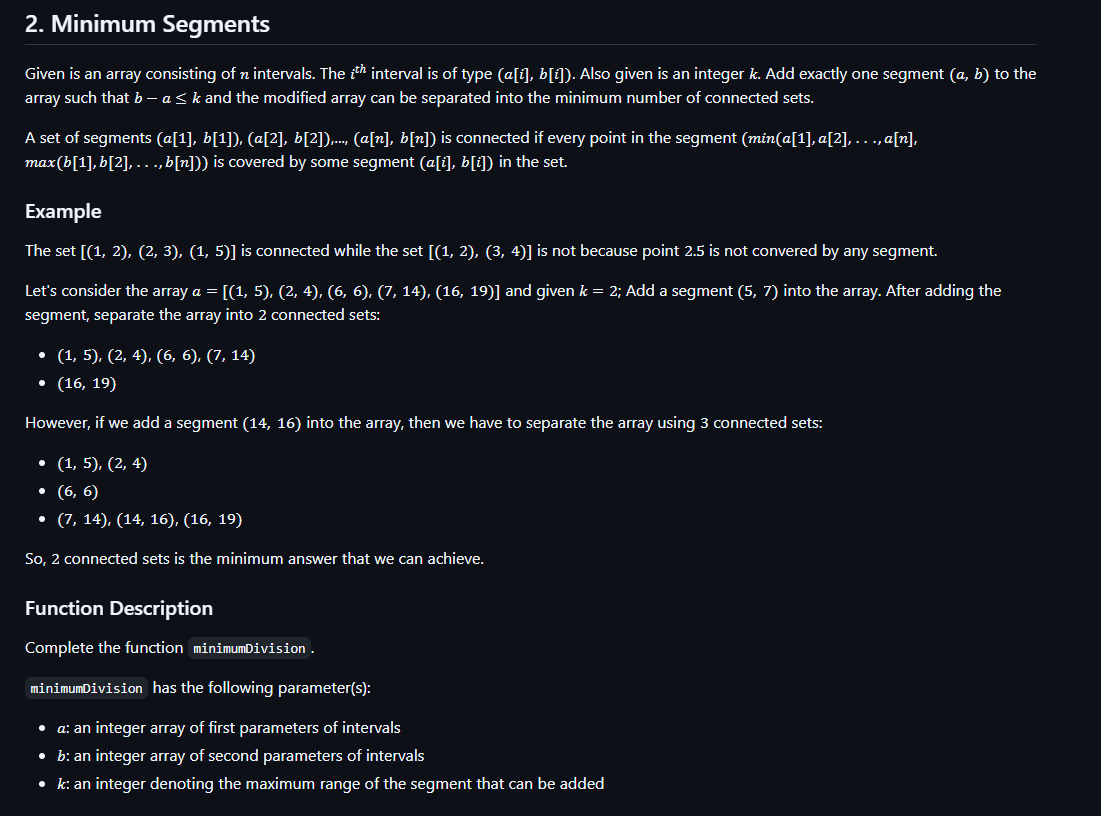
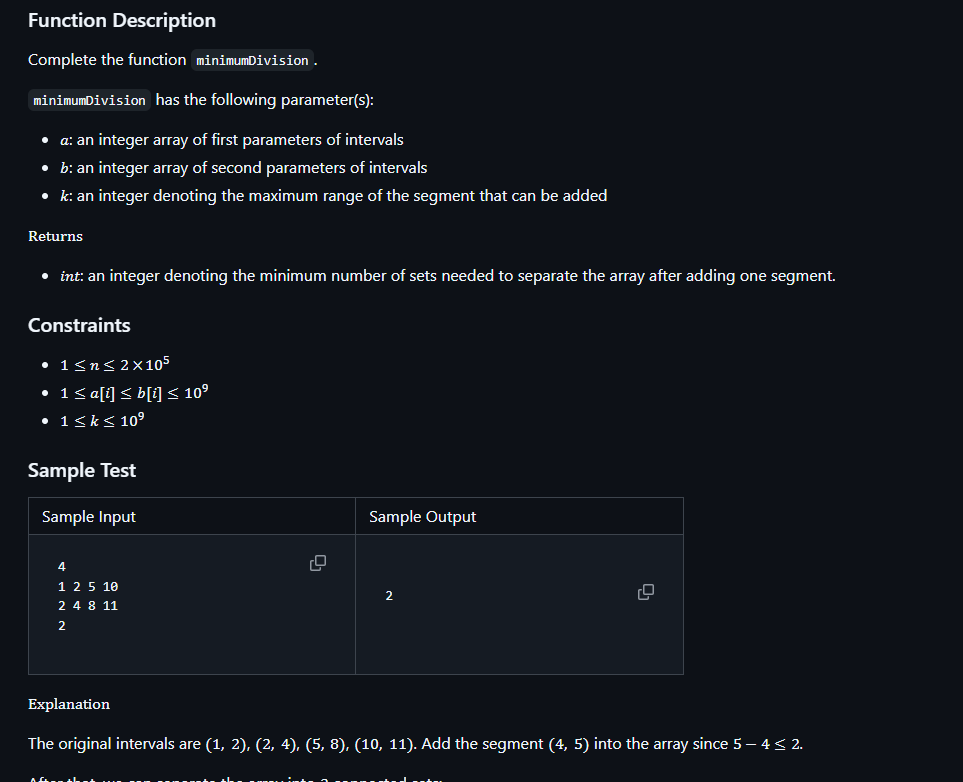

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'



/*
#include <ext/pb_ds/assoc_container.hpp>
#include <ext/pb_ds/tree_policy.hpp>
using namespace __gnu_pbds;

typedef tree<int, null_type, less_equal<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;

*/

#define int long long
/*

os.find_by_order(os.order_of_key(num));      
os.order_of_key(num) position of number 
*/

void solve(){

    int n,k;
    cin>>n>>k;
    vector<int>a(n),b(n);
    for(int i=0;i<n;i++)cin>>a[i];
    for(int i=0;i<n;i++)cin>>b[i]; 
    vector<pair<int,int>>vp(n);
    for(int i=0;i<n;i++){
        vp[i]={a[i],b[i]};
    }

    sort(vp.begin(),vp.end());

    stack<pair<int,int>>st; 
    st.push(vp[0]);

    for(int i=1;i<n;i++){
        auto x=st.top();
        st.pop();
        if(vp[i].first<=x.second){
            st.push({x.first,max(x.second,vp[i].second)});
        }else{
            st.push(x);
            st.push(vp[i]);
        }
    }

    vp.clear();
    while(!st.empty()){
        vp.push_back(st.top());
        st.pop();
    }
    reverse(vp.begin(),vp.end());
    int m=vp.size();
    int ans=m;


    for(int i=0;i<m;i++){
        auto it=lower_bound(vp.begin()+i,vp.end(),make_pair(vp[i].second+k,LLONG_MAX));
        if(it!=vp.begin()+i+1){
            it--;
            int pos=it-vp.begin();
            ans=min(ans,i+1+(m-(pos+1)));

        }
    }
    cout<<ans<<endl;


    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);    
    // int _t;cin>>_t;while(_t--)
    solve();
}